In [1]:
import numpy as np

def onedim_8sites_IsingModel_OBC(qc,n_qubits,dt):
    
    odd=[0,2,4,6]
    even=[1,3,5]
    for i in range(n_qubits):
        qc.rz(-2*ht*dt,i) #qc.rz(-2 * theta, i)  # Implements e^{i θ Z} to the qubit i
    qc.barrier()
    for i in odd:
        qc.cx(i,i+1)
    for i in odd:
        qc.rx(-2*J*dt,i)
    for i in odd:
        qc.cx(i,i+1)
    qc.barrier()
    for i in even:
        qc.cx(i,i+1)
    for i in even:
        qc.rx(-2*J*dt,i)
    for i in even:
        qc.cx(i,i+1)
    qc.barrier()      

def onedim_8sites_IsingModel_PBC(qc,n_qubits,dt):
    
    odd=[0,2,4,6]
    even=[1,3,5]
    for i in range(n_qubits):
        qc.rz(-2*ht*dt,i) #qc.rz(-2 * theta, i)  # Implements e^{i θ Z} to the qubit i
    qc.barrier()
    for i in odd:
        qc.cx(i,i+1)
    for i in odd:
        qc.rx(-2*J*dt,i)
    for i in odd:
        qc.cx(i,i+1)
    qc.barrier()
    for i in even:
        qc.cx(i,i+1)
    for i in even:
        qc.rx(-2*J*dt,i)
    for i in even:
        qc.cx(i,i+1)
    qc.barrier()      
    qc.cx(0,n_qubits-1)
    qc.rx(-2*J*dt,0)
    qc.cx(0,n_qubits-1)
    qc.barrier()      


In [ ]:
import sys
print("Python en uso:", sys.executable)

Python en uso: c:\Users\pablo\OneDrive\Escritorio\Universidad\TFG\Qiskit\Scripts\python.exe


In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister


# ===============================
# Create an arbitrary circuit
# ===============================
J=0.02
ht=1
dt=10
time_steps=4
n_qubits=8
qr=QuantumRegister(n_qubits)
qc=QuantumCircuit(qr)

#Initialize the state vector
qc.x(0)
qc.x(7)

for t in range(time_steps):
    onedim_8sites_IsingModel_OBC(qc,n_qubits,dt)

qc.measure_all()

In [ ]:
# ===================================
#  Run on a real quantum computer (here I store my account data locally)
# ===================================
from qiskit_ibm_runtime import QiskitRuntimeService

# Save data locally so you don't have to re-enter it every time
QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token="------------------",
    instance="---------------",
    overwrite=True
)

In [ ]:
service = QiskitRuntimeService()

# See which devices (simulators/QPUs) you have access to
backends = service.backends()
print(backends)

[<IBMBackend('ibm_torino')>, <IBMBackend('ibm_brisbane')>]


In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import transpile
# Get a real backend
backend_real = service.backend("ibm_torino")  
qc_transpiled = transpile(qc, backend=backend_real)

sampler_real = Sampler(backend_real)
job_real = sampler_real.run([qc_transpiled], shots=10000)
counts_real = job_real.result()[0].data.meas.get_counts()


In [10]:
# Inspect result of SamplerV2 primitive performed on real IBM quantum hardware
print("\nResult for the ibm_torino hardware:")
print(counts_real)

result_real = job_real.result()
spans = result_real.metadata["execution"]["execution_spans"]
shots = spans[0].size
print("Total shots executed:", shots)




Result for the ibm_torino hardware:
{'01000010': 971, '00010001': 37, '00000001': 255, '00110110': 5, '10000100': 273, '01000001': 1395, '01000000': 88, '01001001': 36, '01111001': 4, '10001101': 36, '10000010': 1394, '10000001': 1787, '00000100': 40, '11101010': 5, '00100100': 46, '01010010': 28, '01000110': 45, '01000100': 213, '01110010': 24, '10011001': 60, '01100001': 35, '00000010': 183, '00100001': 295, '01000011': 74, '00010010': 27, '00110011': 4, '11010001': 43, '10001010': 48, '01100010': 25, '01110001': 39, '01001000': 26, '11100001': 55, '10000101': 70, '01011011': 5, '10000000': 103, '10000111': 51, '00000011': 19, '01011010': 20, '11001100': 3, '10011010': 30, '01000111': 44, '00000101': 7, '10110001': 37, '01100100': 4, '10001001': 56, '01101100': 7, '11001111': 1, '00100011': 14, '00101001': 15, '10100001': 44, '10110010': 16, '01001101': 24, '11000001': 67, '01011000': 5, '00001000': 7, '00100010': 234, '10101111': 1, '11101101': 2, '10001011': 37, '01111010': 3, '01

In [ ]:
# ===================================
# 3. Calculate the probability that each qubit is in state |1>
#
# ===================================
total_shots = sum(counts_real.values())
prob_qubits = [0] * n_qubits

for bitstring, freq in counts_real.items():
    # bitstring is in little-endian order (q2 q1 q0)
    for i, bit in enumerate(reversed(bitstring)):
        if bit == "1":
            prob_qubits[i] += freq

# Normalize
prob_qubits = [p / total_shots for p in prob_qubits]

print("\nProbability of each qubit being in |1>:")
for i, p in enumerate(prob_qubits):
    print(f"Qubit {i}: {p:.4f}")



Probabilidad de cada qubit de estar en |1>:
Qubit 0: 0.5391
Qubit 1: 0.4193
Qubit 2: 0.1461
Qubit 3: 0.0982
Qubit 4: 0.0946
Qubit 5: 0.1371
Qubit 6: 0.3981
Qubit 7: 0.5021


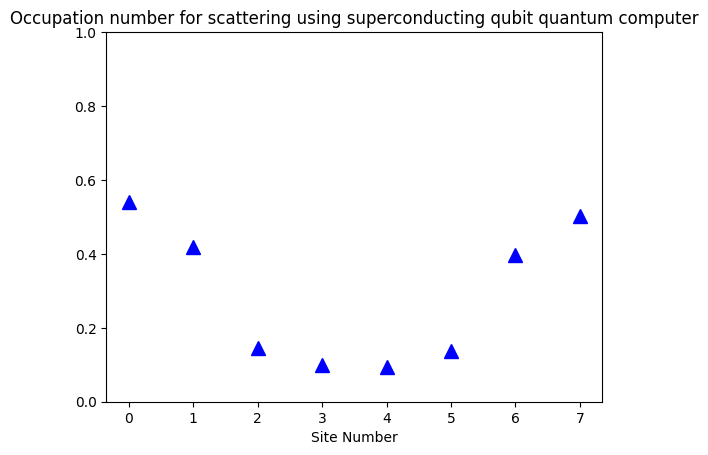

In [ ]:
# ===================================
# Optional display
# ===================================
import matplotlib.pyplot as plt
#plt.bar(range(n_qubits), probs) this is for plotting bars (in the paper are used for representing the exact diagonalization case)

plt.plot(range(len(prob_qubits)), prob_qubits,
         '^',          
         color='blue', 
         markersize=10 
)
plt.ylim(0, 1)
plt.xlabel("Site Number")
plt.title("Occupation number for scattering using superconducting qubit quantum computer")
plt.show()

In [ ]:
# ==============================
# Save results in JSON
# ==============================

import os
import json

results_dict = {
    "counts": counts_real,
    "shots": shots,
    "prob_qubits": prob_qubits
}

with open("results/ibm_torino_case.json", "w") as f:
    json.dump(results_dict, f, indent=4)

print("Results saved in results/ibm_torino_case.json")

# ==============================
# 6. Guardar el histograma
# ==============================
plt.plot(range(len(prob_qubits)), prob_qubits,
         '^', color='blue', markersize=10)
plt.ylim(0, 1)
plt.xlabel("Site Number")
plt.title("Occupation number for scattering using superconducting qubit quantum computer")

plt.savefig("results/ibm_torino_case.png", dpi=300)
plt.show()

print("Histogram saved in results/ibm_torino_case.png")

FileNotFoundError: [Errno 2] No such file or directory: 'results/ibm_torino_case.json'